In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np


iris = datasets.load_iris() #Loading the dataset
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

print(iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [ ]:
species=[]
for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')
iris['species'] = species

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the dataset into features (X) and target variable (y)
X = iris.drop(columns=['target', 'species'])  # Features
y = iris['target']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy using linear: 0.97


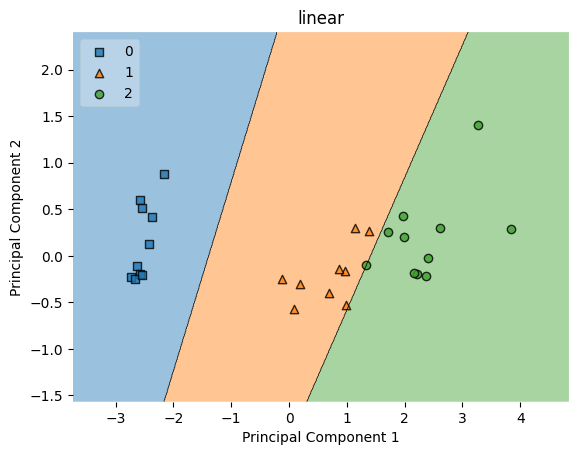

Accuracy using rbf: 1.00


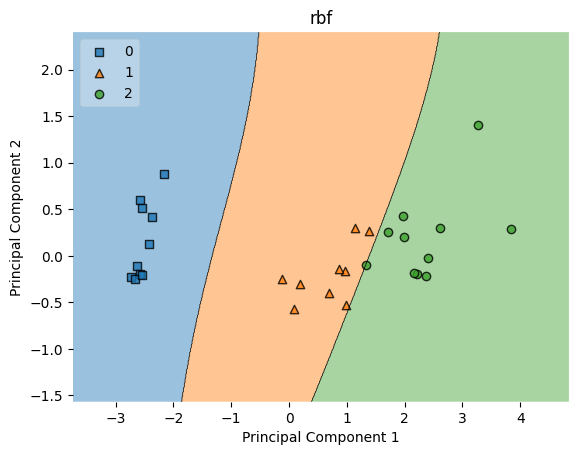

Accuracy using poly: 0.97


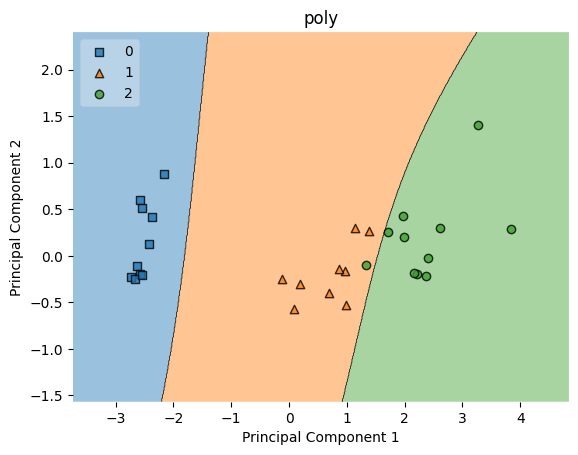

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Assuming you have already defined X_train, X_test, y_train, y_test

# Apply PCA to reduce the feature space to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train_pca, y_train)
    pred = model.predict(X_test_pca)
    print("Accuracy using {}: {:.2f}".format(kernel, accuracy_score(pred, y_test)))

    # Plotting decision boundaries
    plot_decision_regions(X_test_pca, y_test.values.astype(np.int_), clf=model, legend=2)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(kernel)
    plt.show()
